### Neural network from scratch

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

importing the dataset


In [4]:
data = pd.read_csv("mnist_train.csv")

In [5]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
X_dev = data_dev[1:n]
Y_dev = data_dev[0]

data_train = data[1000:m].T
X_train = data_train[1:n]
Y_train = data_train[0]

In [7]:
Y_train
X_train[:,0].shape

(784,)

In [16]:
def init_params():
  w1 = np.random.rand(10,784) -0.5 #check if required
  b1 = np.random.rand(10, 1) -0.5
  w2 = np.random.rand(10,10) -0.5 #check if required
  b2 = np.random.rand(10, 1) -0.5
  return w1,b1,w2,b2


def ReLu(z):
  return np.maximum(0,z)


def softmax(z):
  return np.exp(z) / np.sum(np.exp(z))


def forward_prop(w1, b1, w2, b2, x):
  z1 = w1.dot(x) + b1
  a1 = ReLu(z1)
  z2 = w2.dot(a1) + b2
  a2 = softmax(a1)
  return z1,a1,z2,a2


# def one_hot(y):
#   one_hot_y = np.zeros(y.size, y.max()+1)
#   one_hot_y[np.arange(y.size), y] = 1
#   one_hot_y = one_hot_y.T
#   return one_hot_y

def one_hot(y):
  one_hot_y = np.zeros((y.size, int(y.max()+1))) # ensure integer shape by casting to int
  one_hot_y[np.arange(y.size), y.astype(int)] = 1 # cast y to integers
  one_hot_y = one_hot_y.T
  return one_hot_y


def deriv_ReLu(z):
  return z>0


# def back_prop(z1, a1, z2, a2, w2, x, y):
#   m = y.size
#   one_hot_y = one_hot(y)
#   dz2 = a2 - one_hot_y
#   dw2 = 1 / m * dz2.dot(a1.T)
#   db2 = 1 / m * np.sum(dz2,2)
#   dz1 = w2.T.dot(dz2) * deriv_ReLu(z1)
#   dw1 = 1 / m * dz1.dot(x.T)
#   db1 = 1 / m * np.sum(dz1,2)
#   return dw1, db1 , dw2, db2

def back_prop(z1, a1, z2, a2, w2, x, y):
  m = y.size
  one_hot_y = one_hot(y)
  dz2 = a2 - one_hot_y
  dw2 = 1 / m * dz2.dot(a1.T)
  db2 = 1 / m * np.sum(dz2, axis=1, keepdims=True) # Sum along axis 1 and keep the dimension.
  dz1 = w2.T.dot(dz2) * deriv_ReLu(z1)
  dw1 = 1 / m * dz1.dot(x.T)
  db1 = 1 / m * np.sum(dz1, axis=1, keepdims=True) # Sum along axis 1 and keep the dimension.
  return dw1, db1 , dw2, db2


def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
  w1 = w1 - alpha * dw1
  b1 = b1 - alpha * db1
  w2 = w2 - alpha * dw2
  b2 = b2 - alpha * np.reshape(db2, (10, 1))
  return w1, b1, w2, b2



gradient descent

In [18]:
def get_predictions(a2):
  return np.argmax(a2,0)


def get_accuracy(predictions, y):
  print(f"predictions: {y}")
  return np.sum(predictions == y) / y.size


def gradient_descent(x, y, epochs, alpha):
  w1, b1, w2, b2 = init_params()
  for i in range(epochs):
    z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
    dw1, db1, dw2, db2 = back_prop(z1, a1, z2, a2, w2, x, y) # should we add w2
    w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
    if i % 50 == 0:
      print(f"epoch: {i}")
      print(f"accuracy: {get_accuracy(get_predictions(a2), y)}")
  return w1,b1, w2, b2


w1, b1, w2, b2 = gradient_descent(X_train, Y_train, 400, 0.01)

<ipython-input-16-da784288a9b5>:14: RuntimeWarning: overflow encountered in exp
  return np.exp(z) / np.sum(np.exp(z))
<ipython-input-16-da784288a9b5>:14: RuntimeWarning: invalid value encountered in divide
  return np.exp(z) / np.sum(np.exp(z))


epoch: 0
predictions: [0. 2. 3. ... 3. 5. 0.]
accuracy: 0.1115748469671675
epoch: 50
predictions: [0. 2. 3. ... 3. 5. 0.]
accuracy: 0.09794101279910963
epoch: 100
predictions: [0. 2. 3. ... 3. 5. 0.]
accuracy: 0.09794101279910963
epoch: 150
predictions: [0. 2. 3. ... 3. 5. 0.]
accuracy: 0.09794101279910963
epoch: 200
predictions: [0. 2. 3. ... 3. 5. 0.]
accuracy: 0.09794101279910963
epoch: 250
predictions: [0. 2. 3. ... 3. 5. 0.]
accuracy: 0.09794101279910963
epoch: 300
predictions: [0. 2. 3. ... 3. 5. 0.]
accuracy: 0.09794101279910963
epoch: 350
predictions: [0. 2. 3. ... 3. 5. 0.]
accuracy: 0.09794101279910963


In [26]:
def make_predictions(x, w1, b1, w2, b2):
  z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
  predictions = get_predictions(a2)
  return predictions


def test_prediction(index, w1, b1, w2, b2):
  current_image = X_train[:, index-1, None]
  prediction = make_predictions(X_train[:, index-1, None], w1,b1,w2,b2)
  label = Y_train[index-1]
  print(f"prediction: {prediction}")
  print(f"label: {label}")

  current_image = current_image.reshape((28,28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation = 'nearest')
  plt.show()

prediction: [0]
label: 2.0


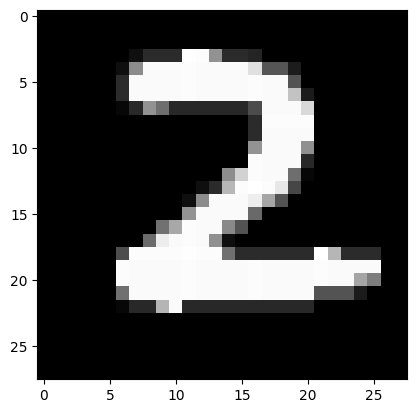

In [27]:
test_prediction(2,w1,b1,w2,b2)

scope of improvement

use cross validation sets,
tunning the hyperparameters,
using more layers of neurons